In [1]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2


# необходимо для корректного импорта своих модулей в JupyterLab
import sys
current_dir = sys.path[0]
project_dir = 'SF_DS_Pro'
last_position = current_dir.find(project_dir) + len(project_dir)
project_path = current_dir[:last_position]
sys.path.append(project_path)


%matplotlib inline
import matplotlib.pyplot as plt # библиотека визуализации
import seaborn as sns
# sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10, 8)})


import warnings
warnings.filterwarnings('ignore')


from IPython.core.display import HTML
HTML("""
<style>
.p-Widget.jp-OutputPrompt.jp-OutputArea-prompt:empty {
  padding: 0;
  border: 0;
}
</style>
""")

In [2]:
import pandas as pd

Проводится A/B-тестирование для двух вариантов дизайна сайта. Результаты тестирования собраны в двух файлах (данные для группы А и для группы B).

Каждая таблица имеет следующие поля:

date — дата наблюдения;

cid — идентификатор посетителя;

transactions — количество совершённых целевых действий (транзакций);

revenue — сумма покупки;

group — группа (тестовая — А, контрольная — B).

In [3]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.zip')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.zip')

In [4]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61571 non-null  object 
 1   cid           61571 non-null  float64
 2   transactions  61571 non-null  int64  
 3   revenue       61571 non-null  int64  
 4   group         61571 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [5]:
sample_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61383 non-null  object 
 1   cid           61383 non-null  float64
 2   transactions  61383 non-null  int64  
 3   revenue       61383 non-null  int64  
 4   group         61383 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


Постройте таблицу со следующими ежедневными показателями:

количество посетителей сайта;

суммарное число транзакций;

общая сумма покупок (выручка).

Для этого сгруппируйте данные по признаку date, предварительно преобразовав его к типу datetime.

In [6]:
# форматирую дату
sample_a['date'] = pd.to_datetime(sample_a['date'])
sample_b['date'] = pd.to_datetime(sample_b['date'])

In [7]:
# конвертирую типы
sample_a = sample_a.convert_dtypes()
sample_b = sample_b.convert_dtypes()

In [8]:
# Т.к. столбцы в таблице одни и те де, просто объединяю таблицы вертикально в одну
ab_data = pd.concat([sample_a, sample_b])

In [9]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122954 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          122954 non-null  datetime64[ns]
 1   cid           122954 non-null  Float64       
 2   transactions  122954 non-null  Int64         
 3   revenue       122954 non-null  Int64         
 4   group         122954 non-null  string        
dtypes: Float64(1), Int64(2), datetime64[ns](1), string(1)
memory usage: 6.0 MB


In [10]:
# Группирую по дате и группе, пользователей считаю по cid, транзакции и доход суммирую
daily_ab_data = ab_data.groupby(['date', 'group']).agg({'cid': 'count', 'transactions': 'sum', 'revenue': 'sum'})
# Сбрасываю дату и группу из индекса в отдельные столбцы
daily_ab_data.reset_index(inplace=True)
# Переименовываю столбец с количеством пользователей
daily_ab_data.rename(columns={'cid': 'users'}, inplace=True)

In [11]:
daily_ab_data

,date,group,users,transactions,revenue
0,2020-11-06,A,2576,16,1577279
1,2020-11-06,B,2499,19,996645
2,2020-11-07,A,2704,23,1721886
3,2020-11-07,B,2804,19,555499
4,2020-11-08,A,3354,25,846051
5,2020-11-08,B,3291,24,3044842
6,2020-11-09,A,3234,18,708830
7,2020-11-09,B,3062,25,1285836
8,2020-11-10,A,3022,29,826984
9,2020-11-10,B,3072,30,2414726


Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?

Количество посетителей сайта:

Суммарное число транзакций:

Общая сумма покупок:

In [12]:
a_in_current_day = daily_ab_data[(daily_ab_data['date'] == pd.to_datetime('2020-11-08')) & (daily_ab_data['group'] == 'A')]
a_in_current_day

,date,group,users,transactions,revenue
4,2020-11-08,A,3354,25,846051


Добавьте в каждую из таблиц кумулятивные метрики:

кумулятивное количество посетителей сайта;

кумулятивное суммарное число транзакций;

кумулятивная общая сумма покупок (кумулятивная выручка).

Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).

Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? Ответ округлите до сотых, знаки процентов не вводите.

In [13]:
daily_ab_data['cum_users'] = daily_ab_data.groupby(['group'])['users'].cumsum()
daily_ab_data['cum_transactions'] = daily_ab_data.groupby(['group'])['transactions'].cumsum()
daily_ab_data['cum_revenue'] = daily_ab_data.groupby(['group'])['revenue'].cumsum()
daily_ab_data['cum_conversion'] = daily_ab_data['cum_transactions'] / daily_ab_data['cum_users']
daily_ab_data['cum_check'] = daily_ab_data['cum_revenue'] / daily_ab_data['cum_transactions']

In [14]:
daily_ab_data

,date,group,users,transactions,revenue,cum_users,cum_transactions,cum_revenue,cum_conversion,cum_check
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,0.006211,98579.9375
1,2020-11-06,B,2499,19,996645,2499,19,996645,0.007603,52455.0
2,2020-11-07,A,2704,23,1721886,5280,39,3299165,0.007386,84593.974359
3,2020-11-07,B,2804,19,555499,5303,38,1552144,0.007166,40845.894737
4,2020-11-08,A,3354,25,846051,8634,64,4145216,0.007413,64769.0
5,2020-11-08,B,3291,24,3044842,8594,62,4596986,0.007214,74144.935484
6,2020-11-09,A,3234,18,708830,11868,82,4854046,0.006909,59195.682927
7,2020-11-09,B,3062,25,1285836,11656,87,5882822,0.007464,67618.643678
8,2020-11-10,A,3022,29,826984,14890,111,5681030,0.007455,51180.45045
9,2020-11-10,B,3072,30,2414726,14728,117,8297548,0.007944,70919.213675


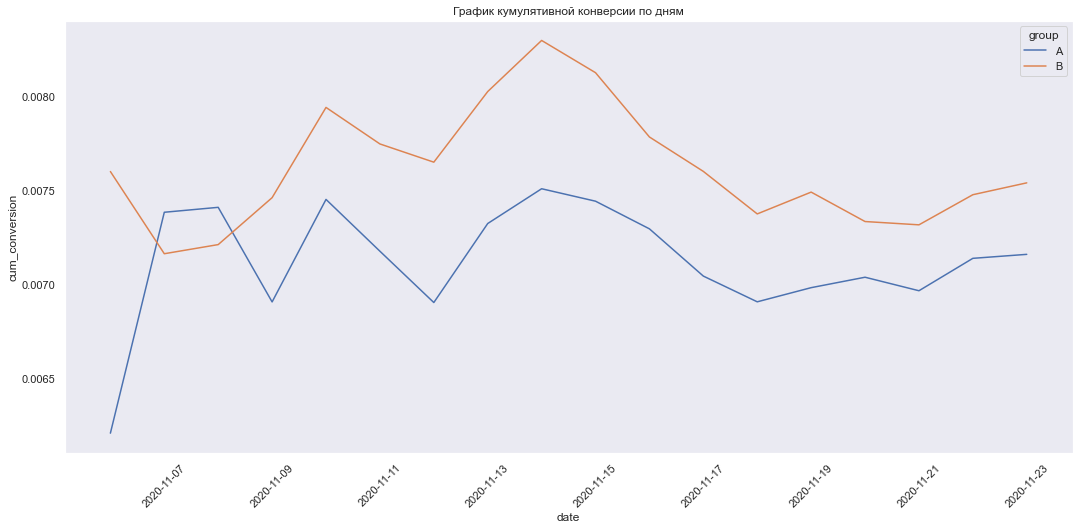

In [15]:
# создаём фигуру размером
fig = plt.figure(figsize=(14, 6))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_ab_data,
    x='date',
    y='cum_conversion',
    hue='group',
    ax=ax
)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

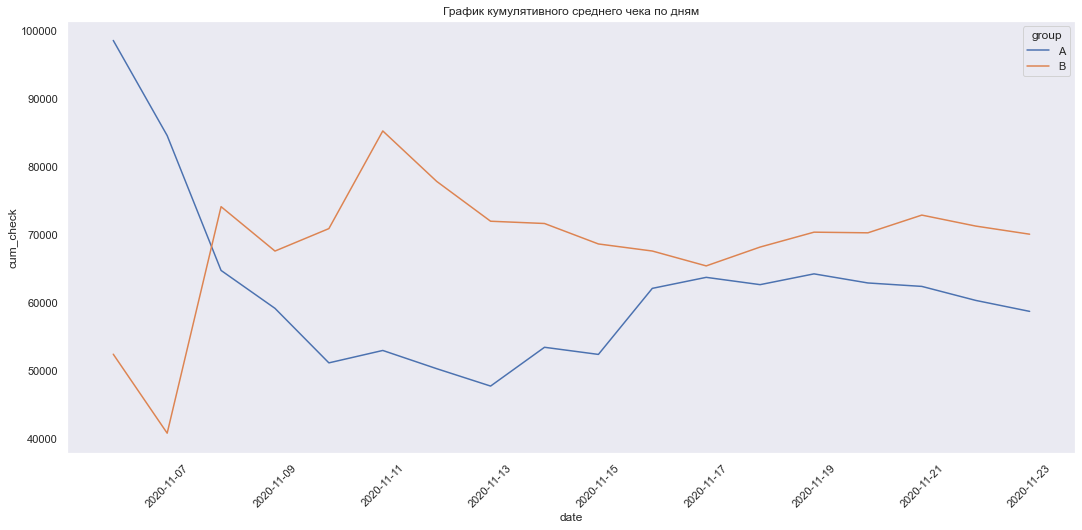

In [16]:
# создаём фигуру размером
fig = plt.figure(figsize=(14, 6))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_ab_data,
    x='date',
    y='cum_check',
    hue='group',
    ax=ax
)
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

---

### Задание 5.2
Проверьте гипотезу о равенстве конверсий в группах А и B при альтернативной гипотезе:

Конверсия в группе А меньше, чем конверсия в группе B. 

Используйте функцию proportions_ztest() из модуля statsmodels.stats.proportion. 

В качестве уровня значимости возьмите alpha=0.1

In [17]:
ab_data

,date,cid,transactions,revenue,group
0,2020-11-06,1001647767.160467,0,0,A
1,2020-11-06,1001936214.160466,0,0,A
2,2020-11-06,100321440.16039,0,0,A
3,2020-11-06,1004392551.160371,0,0,A
4,2020-11-06,1006382383.160468,0,0,A
...,...,...,...,...,...
61378,2020-11-23,996567508.16057,0,0,B
61379,2020-11-23,99708031.160612,0,0,B
61380,2020-11-23,998481353.160612,0,0,B
61381,2020-11-23,999111821.160602,0,0,B


In [18]:
conversion_piv = ab_data.groupby('group')['transactions'].agg(['sum', 'count'])
conversion_piv

,sum,count
group,,
A,441,61571
B,463,61383


In [19]:
# Импортируем функцию proportions_ztest() из модуля statsmodels:
from statsmodels.stats.proportion import proportions_ztest

In [20]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости

# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=conversion_piv['sum'], # число "успехов"
    nobs=conversion_piv['count'], # общее число наблюдений
    alternative='smaller'
    )

# выводим результат на экран
print(f'p-value: {round(p_value, 2)}')

# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print(f"Отвергаем нулевую гипотезу. {H0}")
    print(f"Альтернативная гипотеза. H1: {H1}")
else:
    print(f"Принимаем нулевую гипотезу. {H0}")

p-value: 0.22
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


### Задание 5.3
Проверьте гипотезу о нормальности распределений ежедневного среднего чека с помощью критерия Шапиро-Уилка.

В качестве уровня значимости возьмите alpha=0.1

In [21]:
daily_ab_data['mean_daily_check'] = daily_ab_data['revenue'] / daily_ab_data['transactions']
daily_ab_data

,date,group,users,transactions,revenue,cum_users,cum_transactions,cum_revenue,cum_conversion,cum_check,mean_daily_check
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,0.006211,98579.9375,98579.9375
1,2020-11-06,B,2499,19,996645,2499,19,996645,0.007603,52455.0,52455.0
2,2020-11-07,A,2704,23,1721886,5280,39,3299165,0.007386,84593.974359,74864.608696
3,2020-11-07,B,2804,19,555499,5303,38,1552144,0.007166,40845.894737,29236.789474
4,2020-11-08,A,3354,25,846051,8634,64,4145216,0.007413,64769.0,33842.04
5,2020-11-08,B,3291,24,3044842,8594,62,4596986,0.007214,74144.935484,126868.416667
6,2020-11-09,A,3234,18,708830,11868,82,4854046,0.006909,59195.682927,39379.444444
7,2020-11-09,B,3062,25,1285836,11656,87,5882822,0.007464,67618.643678,51433.44
8,2020-11-10,A,3022,29,826984,14890,111,5681030,0.007455,51180.45045,28516.689655
9,2020-11-10,B,3072,30,2414726,14728,117,8297548,0.007944,70919.213675,80490.866667


In [22]:
check_a = daily_ab_data[daily_ab_data['group'] == 'A']['mean_daily_check']
check_b = daily_ab_data[daily_ab_data['group'] == 'B']['mean_daily_check']

In [23]:
from scipy.stats import shapiro

# нулевая и альтернативная гипотезы
H0 = 'Средний дневной чек распределен в обоих группах нормально'
H1 = 'Распределение среднего дневного чека в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости

# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(check_a)
shapiro_result_b = shapiro(check_b)
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print(f"Отвергаем нулевую гипотезу. {H0}")
    print(f"Альтернативная гипотеза. H1: {H1}")
else:
    print(f"Принимаем нулевую гипотезу. {H0}")

p-value группы А 0.01
p-value группы B 0.02
Отвергаем нулевую гипотезу. Средний дневной чек распределен в обоих группах нормально
Альтернативная гипотеза. H1: Распределение среднего дневного чека в одной или обеих группах отлично от нормального


### Задание 5.4

Проверьте гипотезу о равенстве ежедневных средних чеков с помощью критерия Манна-Уитни при альтернативной гипотезе: 

Ежедневный средний чек в группе А меньше, чем в группе B. 

Используйте функцию mannwhitneyu() из модуля scipy.stats. В качестве уровня значимости возьмите .

In [24]:
from scipy.stats import mannwhitneyu

# нулевая и альтернативная гипотезы
H0 = 'Ежедневные средние чеки в группах равны.'
H1 = 'Ежедневный средний чек в группе А меньше, чем в группе B.'
alpha = 0.1 #уровень значимости

#вычисляем результат критерия Манна-Уитни
_, p_value = mannwhitneyu(
    x=list(check_a),
    y=list(check_b), 
    alternative='less'
)
print('p-value:', round(p_value, 2))
 
if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу. {H0}")
    print(f"Альтернативная гипотеза. H1: {H1}")
else:
    print(f"Принимаем нулевую гипотезу. {H0}")

p-value: 0.09
Отвергаем нулевую гипотезу. Ежедневные средние чеки в группах равны.
Альтернативная гипотеза. H1: Ежедневный средний чек в группе А меньше, чем в группе B.
